<a href="https://colab.research.google.com/github/RMSCRV/IB2AD/blob/main/IB2AD0_W7_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("loan_data.csv", encoding="latin1")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (50000, 16)


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


In [ ]:
print(df.isnull())

         age  years_employed  annual_income  credit_score  \
0      False           False          False         False   
1      False           False          False         False   
2      False           False          False         False   
3      False           False          False         False   
4      False           False          False         False   
...      ...             ...            ...           ...   
49995  False           False          False         False   
49996  False           False          False         False   
49997  False           False          False         False   
49998  False           False          False         False   
49999  False           False          False         False   

       credit_history_years  savings_assets  current_debt  defaults_on_file  \
0                     False           False         False             False   
1                     False           False         False             False   
2                     False   

/tmp/ipython-input-2682628412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="loan_status", palette={'1': 'skyblue', '0': 'tomato'})


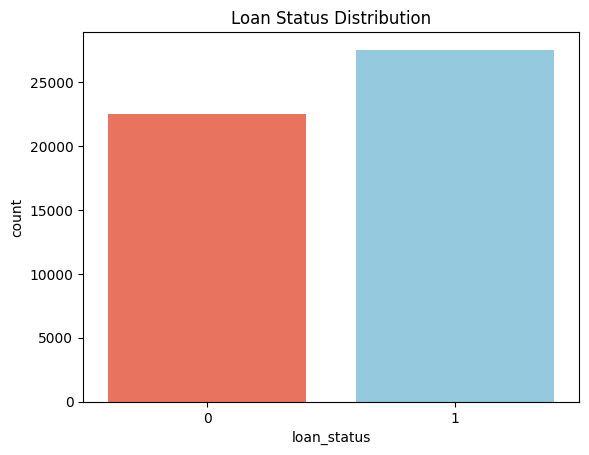

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x="loan_status", palette={'1': 'skyblue', '0': 'tomato'})
plt.title("Loan Status Distribution")
plt.show()

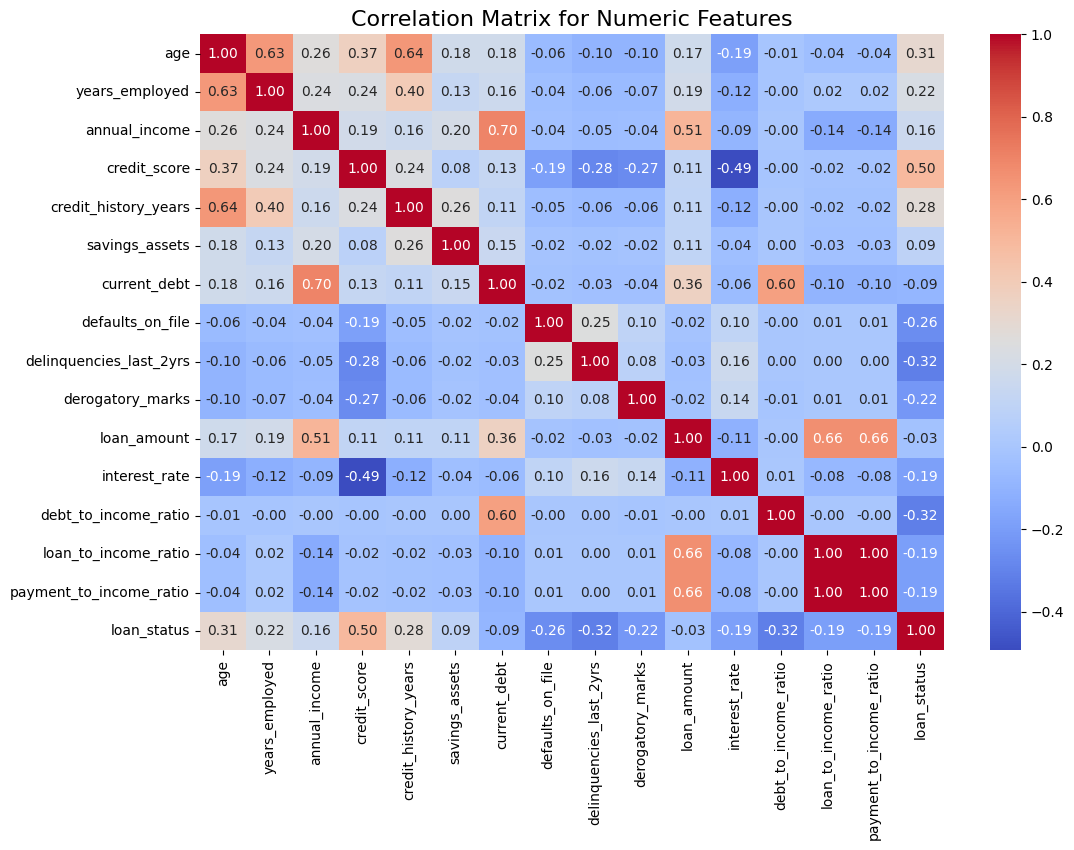

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix directly on the numerical DataFrame
corr = df.corr()

plt.figure(figsize=(12, 8)) # Adjusted figure size for better readability
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm') # Using 'coolwarm' colormap
plt.title("Correlation Matrix for Numeric Features", fontsize=16)
plt.show()

Correlation matrix between numerical features. As expected, loan to income and payment to income ratios

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Separate features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Initialize the MinMaxScaler to scale data between 0 and 1
minmax_scaler = MinMaxScaler()

# Fit and transform the features
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Create a new DataFrame with min-max scaled features
df_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Add the target variable back to the scaled DataFrame
df_minmax_scaled['loan_status'] = y

print("First 5 rows of the Min-Max Scaled DataFrame:")
display(df_minmax_scaled.head())

First 5 rows of the Min-Max Scaled DataFrame:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.0,0.001005,0.648235,0.527569,0.007526,0.007530,1
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.0,0.530653,0.476471,0.478697,0.616658,0.615964,0
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.0,0.016080,0.725294,0.469925,0.046663,0.046687,1
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.0,0.024121,0.749412,0.496241,0.045660,0.045181,1
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.0,0.995980,0.465882,0.241855,0.781234,0.781627,1


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the min-max scaled DataFrame
X = df_minmax_scaled.drop('loan_status', axis=1)
y = df_minmax_scaled['loan_status']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40000, 15)
Shape of X_test: (10000, 15)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for small datasets and binary classification

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4495
           1       0.84      0.86      0.85      5505

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Task
Analyze the Logistic Regression model's performance by generating a confusion matrix using `y_test` and `y_pred`. Install the `shap` library to generate SHAP explanations for the model, calculate SHAP values for `X_test` using `model.predict` and `X_train` as background data. Finally, visualize feature contributions using SHAP summary plots (bar and standard) and summarize the model's performance and key feature importances.

## Build Confusion Matrix

### Subtask:
Generate and display a confusion matrix using `y_test` and `y_pred` (from the Logistic Regression model) to visualize its performance, showing correct and incorrect predictions for each class.


**Reasoning**:
To visualize the performance of the Logistic Regression model, I will generate and display a confusion matrix using `y_test` and `y_pred`.



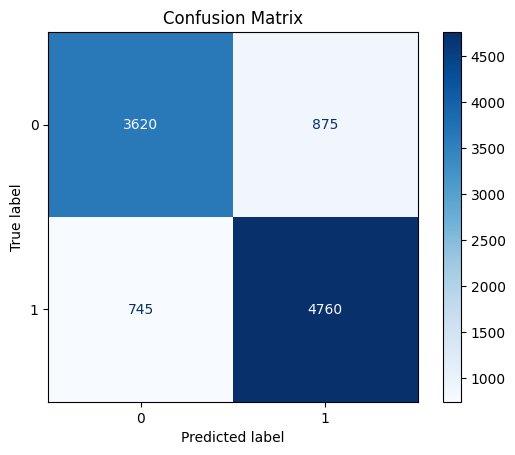

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()